# DS-GA 3001.009 Modeling Time Series Data
# Lab 1: ACF, CCF and ARMA

functions and packages needed

In [1]:
# Install statsmodels
# conda install -c conda-forge statsmodels
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
# statsmodels.graphics.tsaplots doesn't have plotting function for CCF so I have to write my own.
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, vlines_kwargs=kwargs)
    # Depending on your version of statsmodels, you may have to use the following instead:
    # statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, vlines_kwargs=kwargs)
    return fig

## Part I:  Autocorrelation Function

### A) implement ACF
Do your own implementation of the ACF function. Your implementation will be checked against statsmodels.tsa.stattools.acf.

In [3]:
def acf_impl(x, nlags):
    """
    TODO
    @param x: a 1-d numpy array (data)
    @param nlags: an integer indicating how far back to compute the ACF
    @return a 1-d numpy array with (nlags+1) elements. 
            Where the first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    result = []
    demo = 0
    mole_list = []
    avg = sum(x)/len(x)
    for i in range(len(x)):
        demo+=(x[i]-avg)**2
    demo = demo/len(x)
    for i in range(1,nlags+1):
        mole = 0
        list1 = x[i:]
        list2 = x[:-i]
        avg1 = sum(list1)/len(list1)
        avg2 = sum(list2)/len(list2)
        for i in range(len(list1)):
            mole+=(list1[i]-avg1)*(list2[i]-avg2)
        mole = mole/len(list1)
        mole_list.append(mole)
    result = [m/demo for m in mole_list]
    result.insert(0,1)
    return np.array(result)

### B) ACF of White Noise 

$$w_t \sim N(0, \sigma^2)$$

- Set $\sigma$ = 1, sample n = 500 points from the process above
- Plot the white noise
- Plot the sample ACF up to lag = 20.
- Calculate the analytical ACF and compare it with the sample ACF.
- What trend/observation can you find in the ACF plot?
- Change n to 50, compare the new ACF plot (n=50) to the old ACF plot (n=500). What causes the difference?

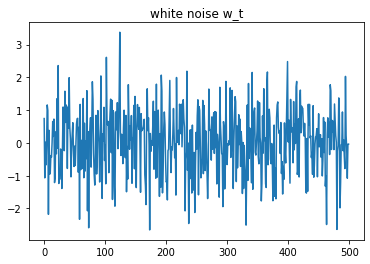

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


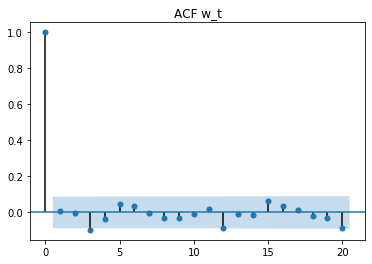

Text(0.5, 1.0, 'your ACF impl against statsmodels')

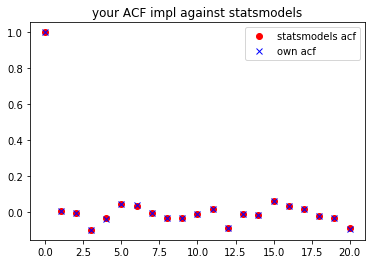

In [4]:
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n)

# plot white noise
plt.plot(w_t)
plt.title("white noise w_t")
plt.show()

# calculate acf
acf_val = acf(x=w_t, nlags=lag)
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=w_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

### C) ACF of Moving Average 

$$v_t = \frac{1}{3}(w_{t}+ w_{t+1}+ w_{t+2})$$

- Sample n+2 white noise from N(0,1)
- Add code to compute the moving average $v_t$.
- Plot both $w_t$ and $v_t$ and compare the two time series.
- Derive the analytical ACF
- Plot the sample/empirical ACF of $v_t$ and compare it with the analytical ACF.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


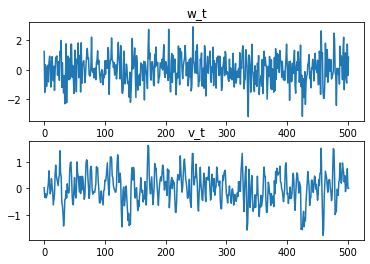

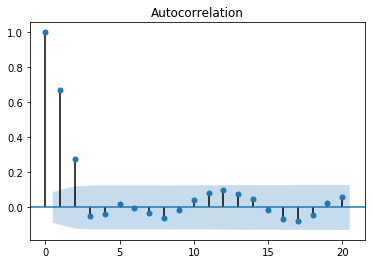

Text(0.5, 1.0, 'your ACF impl against statsmodels')

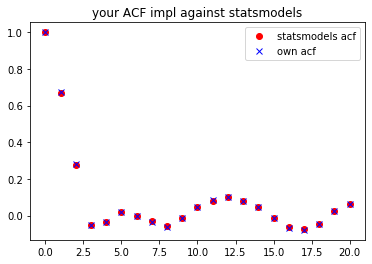

In [5]:
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n+2)
# create moving average
#TODO: replace the template code with your code here. This part will be graded.
v_t = np.zeros(len(w_t))
for i in range(len(w_t)-2):
    v_t[i] = (w_t[i]+w_t[i+1]+w_t[i+2])/3

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")

# plot moving average
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# calculate acf
acf_val = acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag)
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

### D) ACF of signal in noise 

$$v_t = 2 cos(\frac{2\pi t}{50} + 0.6\pi) + w_t$$

- Sample white noise of length n from $N(0,1)$
- Add code to compute $v_t$.
- Plot both $w_t$ and $v_t$. Compare the two plots.
- Plot the sample ACF of $v_t$. What's the pattern? What causes the observed pattern?

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


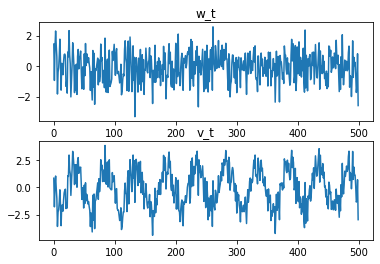

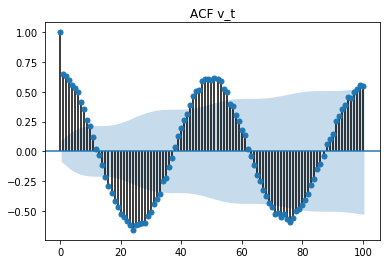

Text(0.5, 1.0, 'your ACF impl against statsmodels')

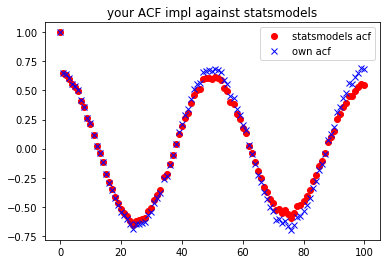

In [6]:
n = 500
mean = 0
std = 1 
lag = 100

# create white noise
w_t = np.random.normal(mean, std, size=n)
# create signal w. noise
#TODO: replace the template code with your code here. This part will be graded.

import math
v_t = np.zeros(len(w_t))  
for i in range(len(v_t)):
    v_t[i] = 2*math.cos(2*math.pi*i/50+0.6*math.pi)+w_t[i]


# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")
# plot signal with noise
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# plot acf
acf_val = acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag, title="ACF v_t")
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

## Part II:  Cross-correlation Function

### A) CCF of signal with noise
#### Synthetic Data

$$x_t \sim N(0, \sigma_x^2) $$

$$ y_t = 2x_{t-5} + w_t$$

$$w_t \sim N(0, \sigma_x^2)$$

- In this example, we created two processes with a lag of 5.
- Plot both samples and verify the lag.
- Plot the empirical ACF for both samples.
- Plot the empirical CCF. What information can you conclude from the CCF plot?

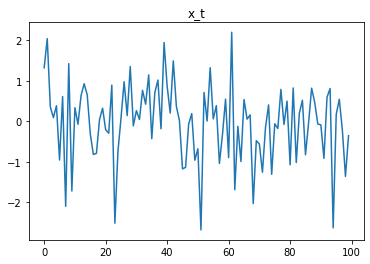

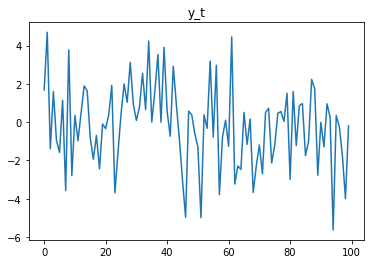

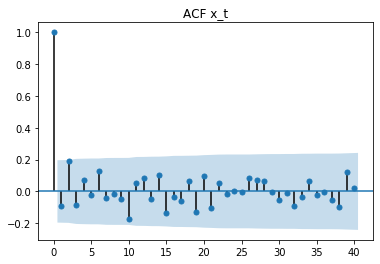

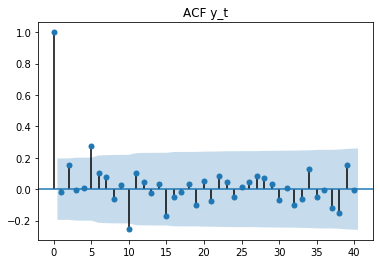

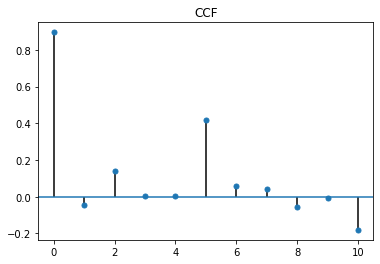

In [7]:
# Cross-correlation synthetic Example
n = 100
mean = 0
std = 1 
lag=40
true_h = 5

x_t = np.random.normal(mean, std, size=n+5)
#TODO: replace the template code with your code here. This part will be graded.
y_t = np.zeros(n)
for i in range(n):
    y_t[i] = 2*x_t[i]+x_t[i+5]

x_t = x_t[:n]

# plot the original data
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# plot acf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

# plot ccf
ccf_val = ccf(y_t, x_t)
plot_ccf(x_t, y_t, title="CCF", lags=10)
plt.show()

### B) CCF of data
#### Southern Oscillation Index (SOI) v.s. Recruitment (Rec)

- Replicate the procedure in the previous section.
- What information can you tell from the CCF plot.
- In this example, our procedure is actually flawed. Unlike the previous example, we can not tell if the cross-correlation estimate is significantly different from zero by looking at the CCF. Why is that? What can we do to address this issue?

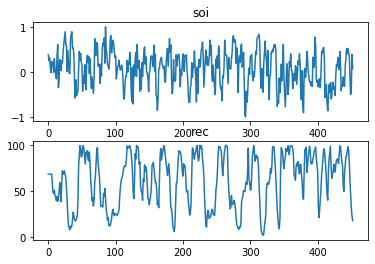

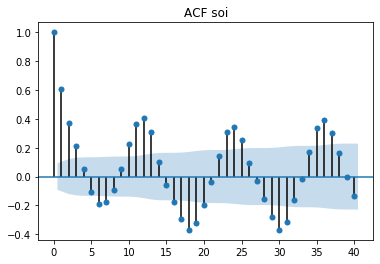

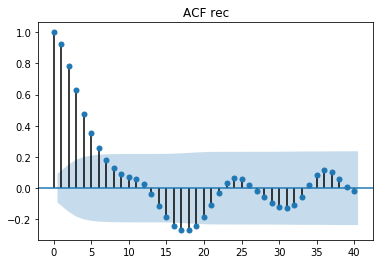

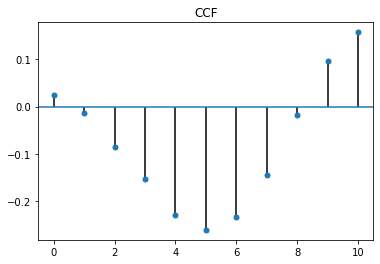

In [8]:
soi = np.array(pd.read_csv("../../data/soi.csv")["x"])
rec = np.array(pd.read_csv("../../data/rec.csv")["x"])
#TODO: This part will be graded.
# plot data

plt.figure(1)
plt.subplot(211)
plt.plot(soi)
plt.title("soi")

plt.subplot(212)
plt.plot(rec)
plt.title("rec")

# plot acf
plot_acf(x=soi, lags=lag, title="ACF soi")
plot_acf(x=rec, lags=lag, title="ACF rec")
plt.show()

# plot ccf
ccf_val = ccf(soi, rec)
plot_ccf(soi, rec, title="CCF", lags=10)
plt.show()


## Part III: AR models

In this example, we will fit an AR(p) model to the SunActivity data, which denotes the number of sunspots for each year.

We will determine p, fit the model, compute the roots and the lag 0 to p components of the ACF.

Wikipedia for sunspots: https://en.wikipedia.org/wiki/Sunspot

The code in this section is selected from the tutorial specified in the reference section.

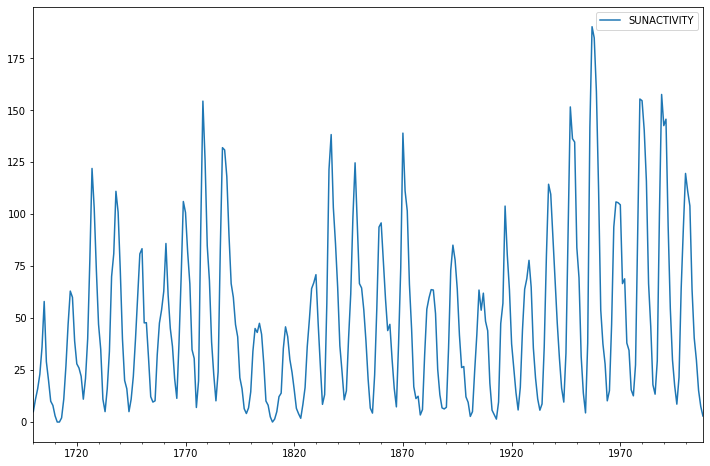

In [9]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8))
plt.show()

#### ACF & PACF

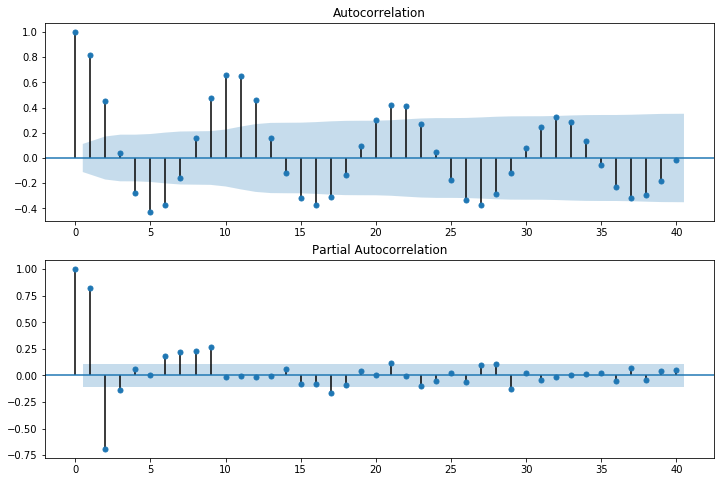

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

#### Fit AR Model of order p


In [11]:
# TODO: chose p appropriately
p = 2

arma_mod = sm.tsa.ARMA(dta, (p,0)).fit(disp=False)
print(arma_mod.params)
# TODO: predict ACF of model at lag 0, 1, ..., p
rho = np.zeros(p+1)
rho[0] = 1
rho[1] = 1.390656/(1+0.688571)
for i in range(2,len(rho)):
    rho[i] = 1.390656*rho[i-1] - 0.688571*rho[i-2]
# TODO: compute roots
roots = np.zeros(2)

print('roots: ', roots)

const                49.659468
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
roots:  [0. 0.]


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


#### prediction

In [12]:
predict_sunspots = arma_mod.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    164.966834
1991-12-31    135.687581
1992-12-31     89.897632
1993-12-31     46.380426
1994-12-31     17.392611
1995-12-31      7.045233
1996-12-31     12.615764
1997-12-31     27.487362
1998-12-31     44.332927
1999-12-31     57.519155
2000-12-31     64.257289
2001-12-31     64.548058
2002-12-31     60.312732
2003-12-31     54.222637
2004-12-31     48.669736
2005-12-31     45.141024
2006-12-31     44.057369
2007-12-31     44.980147
2008-12-31     47.009588
2009-12-31     49.196442
2010-12-31     50.840189
2011-12-31     51.620271
2012-12-31     51.573259
Freq: A-DEC, dtype: float64


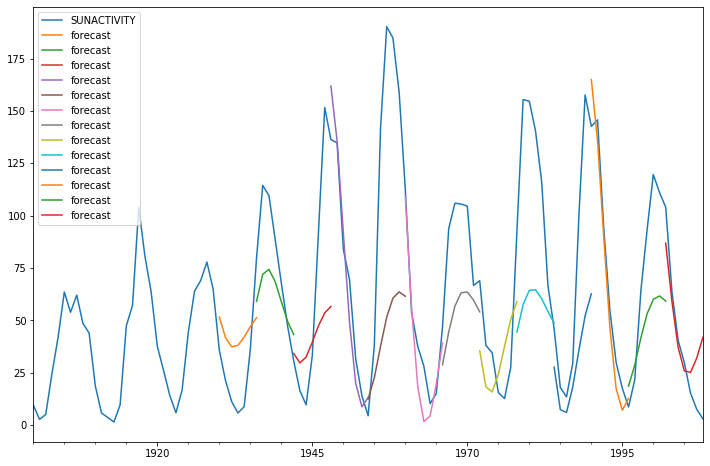

In [13]:
# TODO: try to predict further into the future by increasing tsteps
tsteps=6

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1900':].plot(ax=ax)
T = np.arange(1930, 2010, tsteps)
for tt in range(len(T)-1):
    fig = arma_mod.plot_predict(np.str(T[tt]), np.str(T[tt+1]), dynamic=True, ax=ax, plot_insample=False)
plt.show()

#### plot ACF and PACF

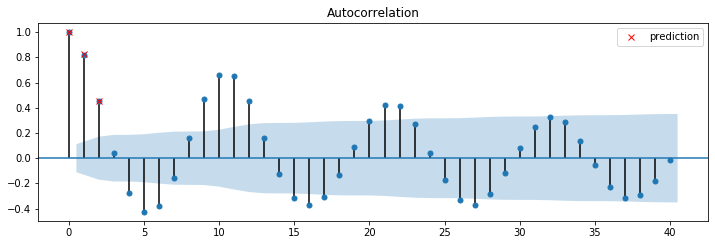

In [14]:
predict_sunspots = arma_mod.predict('1950', '2012', dynamic=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax1.plot(np.arange(p+1), rho, 'xr', label='prediction')
ax1.legend()
plt.show()

## Part IV
### Moving Average

$$x_t = 0.5 x_{t-1} - 0.5 w_{t-1} + w_t$$

$$w_t\sim N(0, \sigma^2)$$

Is $x_t$ same as white noise $w_t$?
Think about ACF.

Then use code below to assess and verify your guess.

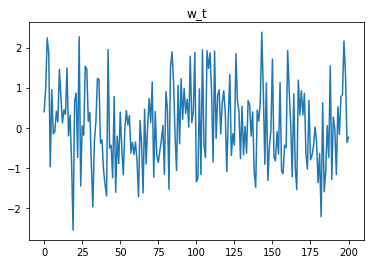

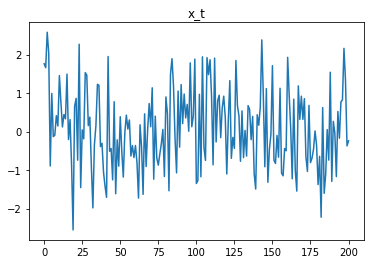

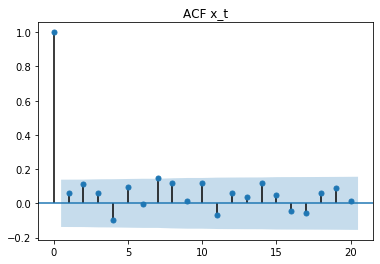

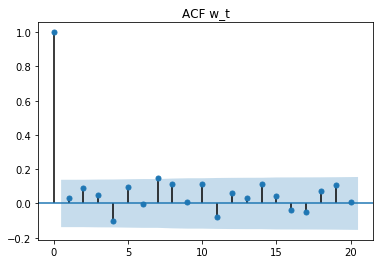

In [15]:
n = 200
mean = 0
std = 1 
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, std, size=n+1) 
for i in range(1, n+1):
    x_t.append(0.5 * x_t[i-1] - 0.5 * w_t[i-1] + w_t[i] )

# plot x_t & w_t
plt.plot(w_t)
plt.title("w_t")
plt.show()
plt.plot(x_t)
plt.title("x_t")
plt.show()

# acf & pacf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

$$x_t = w_t + \frac{1}{5} w_{t-1}, w_t \sim N(0, 25)$$

$$y_t = v_t + 5 v_{t-1}, v_t \sim N(0,1)$$

Are $x_t$ and $y_t$ the same? Think about ACF.

Then use code below to assess and verify your guess.

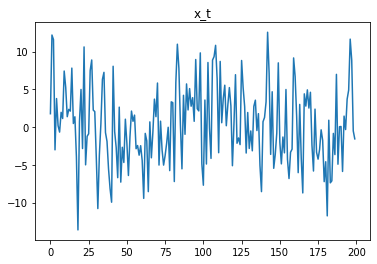

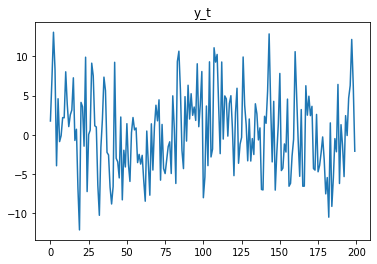

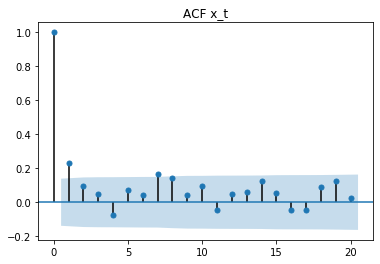

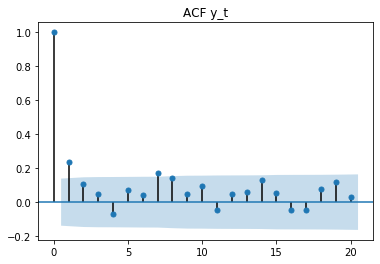

In [16]:
n = 200
mean = 0
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, 5, size=n+1) 
np.random.seed(0)
y_t = list(np.random.normal(mean, std, size=1))
v_t = np.random.normal(mean, 1, size=n+2) 
for i in range(2, n+1):
    x_t.append(w_t[i] + 0.2 * w_t[i-1])
    y_t.append(v_t[i] + 5 * v_t[i-1])

# plot x_t & y_t
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# acf & pacf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

### Please turn in the code before 09/22/2020 11:59 pm. 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. Everything that will be graded is indicated by the "TODO".